In [98]:
import numpy as np
import pandas as pd
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

In [28]:
import os
os.getcwd()

'C:\\Users\\John\\Documents\\churn_app'

In [144]:
os.chdir('C://Users//John//Documents/churn_app/')

In [145]:
file=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [146]:
file.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [147]:
# Checking the data types of all the columns
file.shape

(7043, 21)

In [148]:
file["TotalCharges"] = pd.to_numeric(file["TotalCharges"], errors='coerce')

In [149]:
file.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [150]:
file.dropna(inplace = True)
file.drop("customerID",inplace=True,axis=1)

In [151]:
#Convertin the predictor variable in a binary numeric variable
file['Churn'].replace(to_replace='Yes', value=1, inplace=True)
file['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [152]:
file["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [164]:
file.shape

(7032, 20)

In [153]:
df_dummies = pd.get_dummies(file)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [154]:
file.shape

(7032, 20)

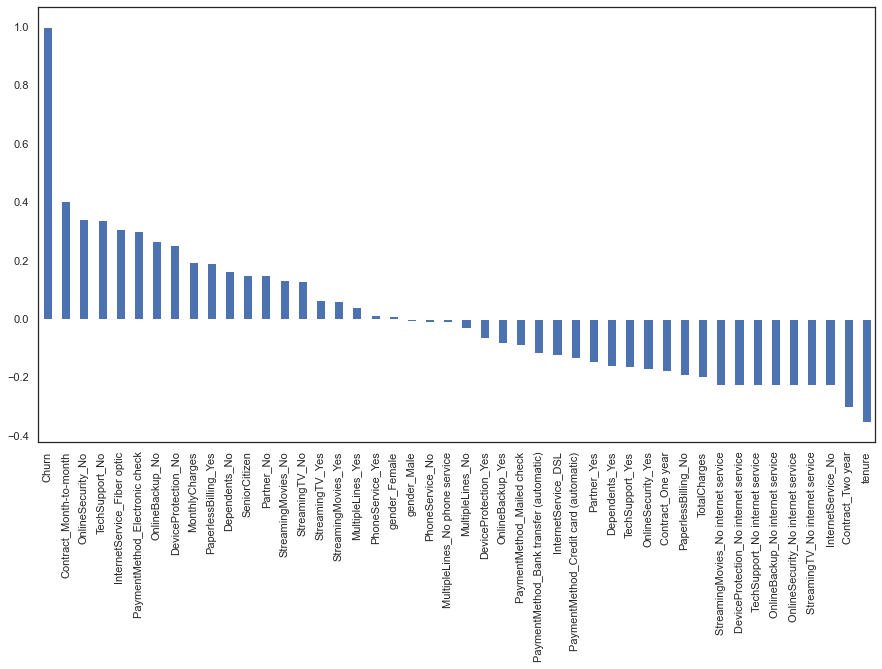

In [155]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [156]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [158]:
## random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


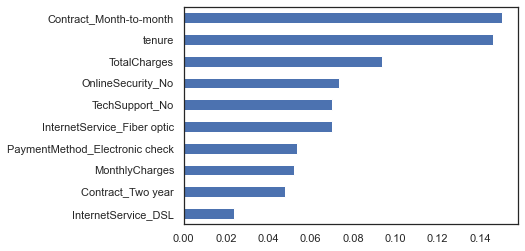

In [159]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [171]:
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(model_rf,pickle_out)
pickle_out.close()

In [160]:
X.shape

(7032, 45)

In [166]:
df_test=pd.read_csv("test_file.csv")
df_test["TotalCharges"] = pd.to_numeric(df_test["TotalCharges"], errors='coerce')
#df_test.dropna(inplace = True)
df_test.drop("customerID",inplace=True,axis=1)
df_test['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_test['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_test1 = pd.get_dummies(df_test)
df_test2 = df_test1.drop(columns = ['Churn'])
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(df_test2)
df_test3 = pd.DataFrame(scaler.transform(df_test2))

    

In [172]:
pickle_in = open("classifier.pkl","rb")
classifier=pickle.load(pickle_in)


In [168]:
df_test3.shape

(88, 45)

In [173]:

prediction_test = classifier.predict(df_test3)

In [174]:
prediction_test

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)